<center>
    
# **Call Center data exploration**
    
</center>

The data for this project has Call Center records from the year 2019. The Call Center Managers want to measure its performance based on certain metrics. The managers want to rise the metrics by improving the Workforce Management (WFM) process of scheduling and staffing agents

In [12]:
from utils import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

**Load one month**

Load the information for the month of January 2019.

In [13]:
PATH = '/project/data'
MONTH = '/01-january.csv'

data = pd.read_csv(PATH + MONTH, parse_dates=['start_date'])
data.set_index('start_date', inplace=True)

data.drop(columns=['id_agn', 'id_ccl', 'id_cont', 'id_cmpg', 'id_sent', 'id_chan', 'id_rsn'], inplace=True)

Print out the first record. 

In [ ]:
data.iloc[0]

The data store in January is normalized. The only information useful fo the analysis is that corresponding to the times in queues the contacts were.

**Frequency**

The frequency of the data can not be inferred with pandas. However, it is know in the call center management that hourly, the rates of incoming calls changes. It is a good idea to resample all the data hourly

In [14]:
# No inferred frequency
pd.infer_freq(data.index)

In [15]:
hourly = data.resample('H').sum()
hourly.head()

,abandon,prequeue,inqueue,agent_time,postqueue,total_time,sla,abandon_time
start_date,,,,,,,,
2019-01-01 00:00:00,11,173,293,0,1,0,0.0,467
2019-01-01 01:00:00,3,136,0,0,0,0,0.0,136
2019-01-01 02:00:00,1,37,0,0,0,0,0.0,37
2019-01-01 03:00:00,2,40,0,0,0,0,0.0,40
2019-01-01 04:00:00,0,0,0,0,0,0,0.0,0


**Disclaimer:** The resample method in pandas fills the missing values with zero. This is fix in the scripts under utils

Plot the number of abandonded calls by hour during the month of January. It shows a weekly pattern.

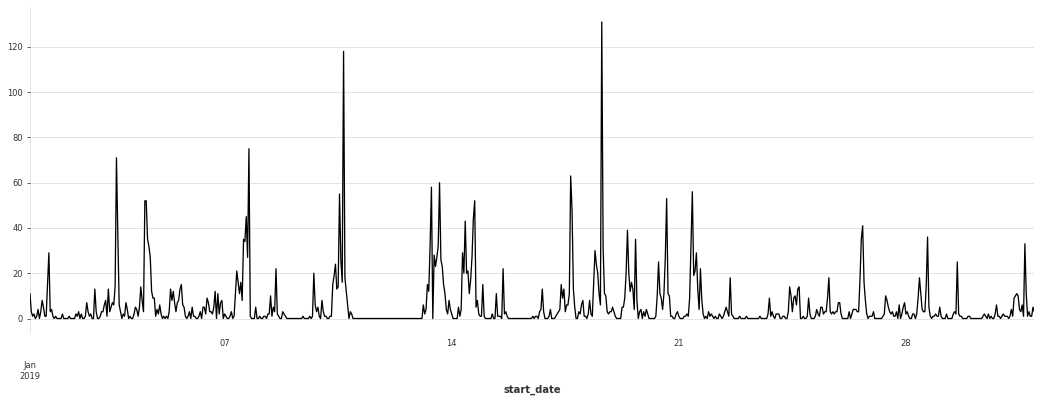

In [16]:
hourly.abandon.plot();

**Disclaimer:** The variable of interest is the daily calls volume per hour. This variable is not present in the original dataset, but its obtained in the utils scripts

The scripts under utils manipulate the data to get usable data for prediction. The data goes through the following pipelines:

1. Selects the columns `abandon`, `prequeue`, `inqueue`, `agent_time`, `postqueue`, `total_time` and `sla`
2. Aggregate by day, hour and month of the year
3. Creates the `calls_volume` variable by counting the number of records for the day, hour and month
4. Fills missing hourly data using mean values for the month an hour

## **Import all the data of the year**

In [17]:
# Load the yearly dataframe for prediction
yearly = get_yearly_frame()
yearly.sample(5, random_state = 42)

,,,abandon,prequeue,inqueue,agent_time,postqueue,total_time,sla,calls_volume
day,hour,month,,,,,,,,
8,10,8,60.0,7.730769,113.807692,137.675824,0.126374,235.098901,1.0,182.0
18,15,10,29.0,14.634328,81.955224,158.529851,0.119403,234.858209,1.0,134.0
5,17,8,29.0,9.376344,109.064516,105.290323,0.204301,192.505376,1.0,93.0
16,20,12,5.0,10.941176,63.308824,232.970588,0.161765,291.308824,1.0,68.0
17,10,1,9.0,7.889764,30.559055,206.84252,0.165354,241.590551,1.0,127.0


## **Getting the Calls Volume per hour on first of january**

Select the data for the first of January 2019. The aggregated values shows that the activity was rather low in that day.

In [ ]:
get_aggregated_daily_frame_for(day=1, data=yearly).loc[:,:,1].head(15)

Plotting the data corresponding to the first of January shows the calls follow a normal distribution calls volume with centered at 10:00 am with mean calls volume of 100 calls per hour

In [ ]:
get_aggregated_daily_frame_for(day=1, data=yearly).loc[:, :, 1][['calls_volume']].sort_index().plot(figsize=(18,6), 
                                                                                                    title="Calls Volume by hour on January, 1st");

## **Getting the Calls Volume at 10 hrs in January**

The hourly rates are important and relevant. For example, considering all the calls volume at 10:00 in the month of January 2019 shows a weekly pattern suggesting the calls at a given hour is related to the day of the month

Plotting the data shows the weekly pattern with just slightly changes in the form of the distributions in between.

In [ ]:
get_aggregated_hourly_frame_for(hour=10, data = yearly)['calls_volume'].loc[:,:,1].plot(figsize=(18,6),
                                                                                        title="Calls volume at 10:00 in January");